<a href="https://colab.research.google.com/github/bigirimanainnocent12/Machine-Learning-avec-GOOGLE-COLAB_R-gression_Lineaire/blob/main/prix_de_l'immobilier_en_fonction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Description des variables de l'étude
---

Le marché immobilier est un domaine d'une importance capitale, influencé par de multiples facteurs économiques, sociaux et environnementaux. Dans le cadre de cette étude, nous nous intéressons à la prédiction du prix des maisons dans les quartiers de Boston, un exercice essentiel pour divers acteurs du secteur immobilier, tels que les promoteurs, les investisseurs et les décideurs politiques.

Utiliser des modèles prédictifs pour estimer la valeur des maisons peut fournir des informations précieuses pour mieux comprendre les dynamiques du marché et anticiper les fluctuations des prix.

Notre analyse est basée sur des variables socio-économiques et démographiques spécifiques qui influencent directement ou indirectement les prix de l'immobilier. Parmi les variables considérées, nous retrouvons :

- MEDV : Valeur médiane des maisons occupées par leurs propriétaires, exprimée en milliers de dollars, qui représente la variable cible à prédire.

- PTRATIO : Ratio élèves/enseignants par commune, un indicateur clé de la qualité des infrastructures éducatives d'un quartier.

- RM : Nombre moyen de pièces par logement, reflétant la taille et le confort des habitations, des éléments essentiels pour les acheteurs potentiels.

- LSTAT : Pourcentage de la population à faible statut socio-économique, qui peut influer sur la demande et la valorisation des propriétés dans un quartier.

En combinant ces caractéristiques, cette étude vise à développer un modèle de régression performant pour prédire les prix immobiliers dans les différents quartiers de Boston. Une telle analyse peut également révéler les facteurs qui jouent un rôle crucial dans la formation des prix, permettant ainsi d'informer les stratégies de développement urbain et les politiques d'investissement.


[Lien pour la base de données](https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd)

# **Importation des bibliothèques**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('housing.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


# **Informations sur les variables**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


# **Vérifications des valeurs manquantes**

In [6]:
df[df.isnull().any(axis=1)]

,RM,LSTAT,PTRATIO,MEDV


# **Statistiques Déscriptives par variables**

In [8]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


# ***Visualiser les corrélations entre les variables***

Text(0.5, 1.0, 'Nuage des points entre PTRATIO et MEDV')

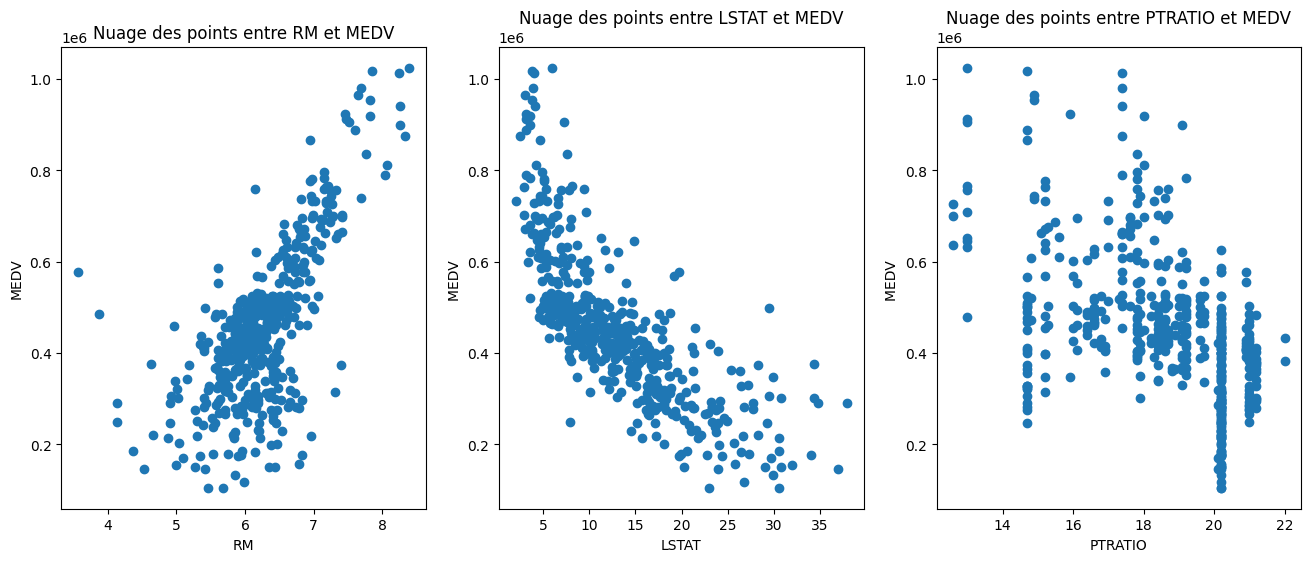

In [9]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['RM'],df['MEDV'],'o')
axes[0].set_ylabel('MEDV')
axes[0].set_xlabel('RM')
axes[0].set_title('Nuage des points entre RM et MEDV')

axes[1].plot(df['LSTAT'],df['MEDV'],'o')
axes[1].set_ylabel('MEDV ')
axes[1].set_xlabel('LSTAT')
axes[1].set_title('Nuage des points entre LSTAT et MEDV')

axes[2].plot(df['PTRATIO'],df['MEDV'],'o')
axes[2].set_ylabel('MEDV ')
axes[2].set_xlabel('PTRATIO')
axes[2].set_title('Nuage des points entre PTRATIO et MEDV')

# **Visualiser les corrélations entre les variables**

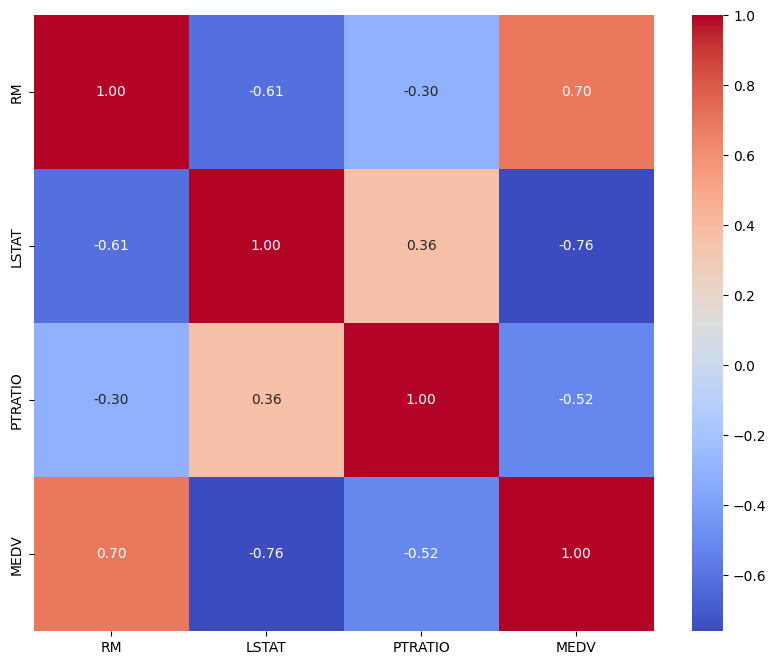

In [10]:
# Visualiser les corrélations entre les variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# ***Modèle de machine learning: Régression linéaire multiple***

*Séparation de données entre deux ensembles:*
- Un ensemble pour l'entraînement
- Un ensemble pour le test

In [19]:
from sklearn.model_selection import train_test_split

X=df.drop('MEDV',axis=1)
y=df['MEDV']

# **Mise à l'échelle des données et Entrainement du modèle**

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', StandardScaler(), X.select_dtypes(include='float64').columns)
    ])


model = make_pipeline(
    preprocessor,
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('MISE A L ECHELLE',
                                                  StandardScaler(),
                                                  Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object'))])),
                ('linearregression', LinearRegression())])

# Prédiction

In [26]:
prediction=model.predict(X_test)

# Evaluation des performances du modèle

In [28]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

mse=mean_squared_error(y_test,prediction)
print(f'Erreur quadratique moyenne Test: {mse}')

r2=r2_score(y_test,prediction)
print(f'Coefficient de détermination Test: {round(r2*100,2)}')

mea=mean_absolute_error(y_test,prediction)
print(f'Erreur absolue moyenne Test: {mea}')

Erreur quadratique moyenne Test: 7048219280.217687
Coefficient de détermination Test: 69.1
Erreur absolue moyenne Test: 63313.4973723415


# Evaluations des résidus

In [29]:
residus=y_test-prediction

Text(0, 0.5, 'Fréquence')

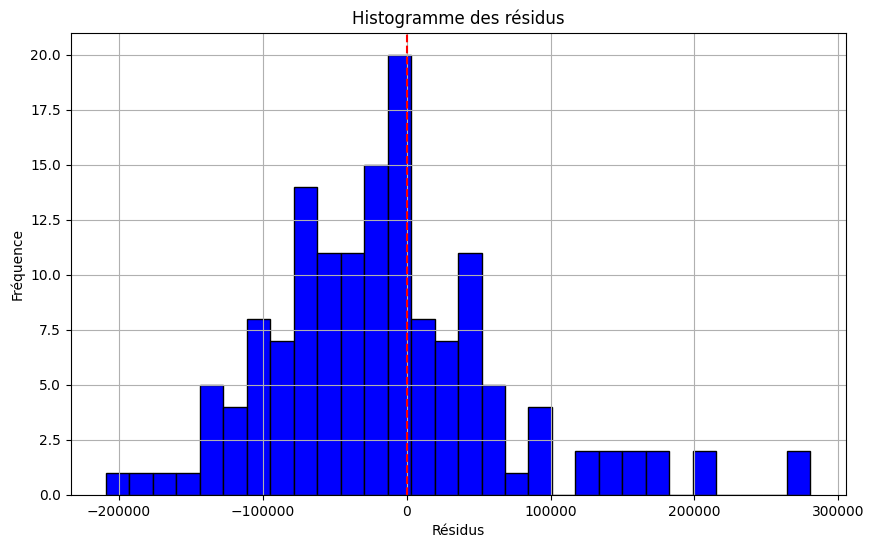

In [30]:
residus.hist(bins=30,figsize=(10,6),edgecolor='black',color='blue')
plt.axvline(x=0,color='red',linestyle='--')
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

<ipython-input-31-1ab5822bd860>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residus)


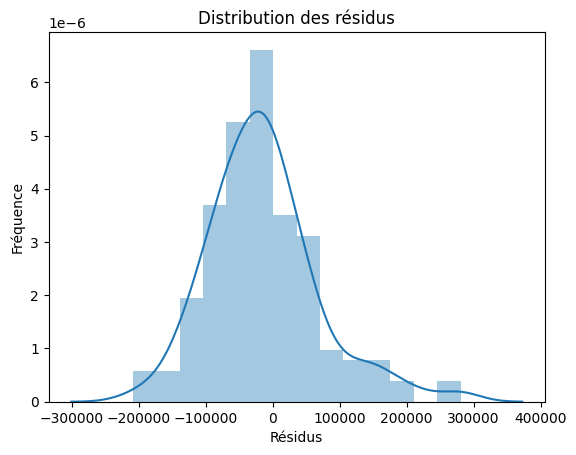

In [31]:
sns.distplot(residus)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

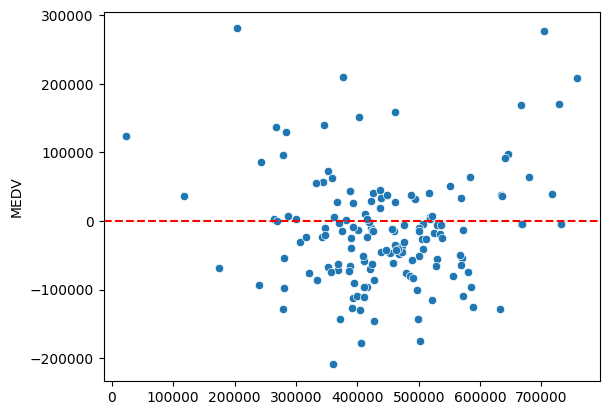

In [32]:
sns.scatterplot(x=prediction,y=residus)
plt.axhline(y=0,color='r',linestyle='--')

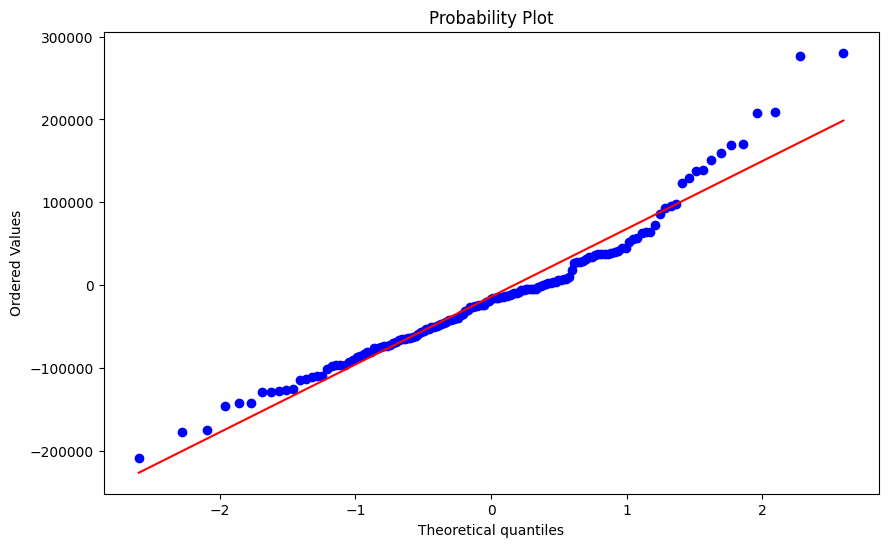

In [33]:
import scipy as sp
fig, axes=plt.subplots(figsize=(  10,6),dpi=100)
_=sp.stats.probplot(residus,plot=axes)

# **Déploiement des modèles**

In [35]:
df.shape

(489, 4)

In [36]:
import joblib

# **Sauvegarde le modèle**

In [39]:
loaded_model=joblib.dump(model,'model.pkl')

# **Coefficient du modèle**

In [42]:
import joblib
loaded_model = joblib.load('model.pkl')

loaded_model.named_steps['linearregression'].coef_

array([ 61624.23472682, -74655.853877  , -41795.7579288 ])

# **Campagne**

Nous organisons une campagne pour prédire le prix d'une maison ayant un ratio élèves/enseignants par commune de 8, avec 4 chambres et un pourcentage de la population à faible statut socio-économique de 23%

In [54]:
campaign=[[8,4,23]]
x_cols=X.columns
campagne=pd.DataFrame(campaign,columns=x_cols)
campagne

,RM,LSTAT,PTRATIO
0,8,4,23


La maison sera estimé à

In [56]:

loaded_model.predict(campagne)[0]

624876.9191133687